Importing the required Library

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing and Reading the data

Import dataset: gdp_1960_2020.csv file

In [21]:
df = pd.read_csv('gdp_1960_2020.csv')

Lets take a look at the data set

In [22]:
df.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


# Data Exploration

Let's first have a descriptive exploration on our data.

In [23]:
# summarize the data
df.describe()

,year,rank,gdp,gdp_percent
count,10134.000000,10134.000000,1.013400e+04,1.013400e+04
mean,1993.579238,87.353069,1.773584e+11,6.019341e-03
std,16.841720,53.688994,9.522888e+11,2.748022e-02
min,1960.000000,1.000000,8.824447e+06,3.550683e-07
25%,1980.000000,42.000000,1.380725e+09,8.875239e-05
50%,1995.000000,84.000000,7.559957e+09,3.650213e-04
75%,2008.000000,128.000000,4.995662e+10,2.499742e-03
max,2020.000000,206.000000,2.143322e+13,4.684827e-01


Narrow down to only show data of the Country Kenya and we will refer that to as Kenya_gdp_data

In [24]:
Kenya_gdp_data=df[df['country']=='Kenya']

Columns view of dataset to know what columns are nessesary for this analysis and remove the rest in the next step

In [25]:
df.columns

Index(['year', 'rank', 'country', 'state', 'gdp', 'gdp_percent'], dtype='object')

In [26]:
Kenya_gdp_data

,year,rank,country,state,gdp,gdp_percent
54,1960,55,Kenya,Africa,791265458,0.000682
157,1961,55,Kenya,Africa,792959472,0.000657
260,1962,55,Kenya,Africa,868111400,0.000657
366,1963,56,Kenya,Africa,926589348,0.000652
471,1964,56,Kenya,Africa,998759333,0.000641
...,...,...,...,...,...,...
9216,2016,70,Kenya,Africa,69188755364,0.000919
9420,2017,69,Kenya,Africa,78965004656,0.000985
9621,2018,66,Kenya,Africa,87778582964,0.001030
9824,2019,65,Kenya,Africa,95503088538,0.001107


In [27]:
Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)

C:\Users\georg\AppData\Local\Temp\ipykernel_5060\2408759043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kenya_gdp_data.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)


In [28]:
Kenya_gdp_data

,year,country,gdp
54,1960,Kenya,791265458
157,1961,Kenya,792959472
260,1962,Kenya,868111400
366,1963,Kenya,926589348
471,1964,Kenya,998759333
...,...,...,...
9216,2016,Kenya,69188755364
9420,2017,Kenya,78965004656
9621,2018,Kenya,87778582964
9824,2019,Kenya,95503088538


## Let's select some features to explore more.

In [29]:
cdf = Kenya_gdp_data[['year','gdp']]
cdf.head()

,year,gdp
54,1960,791265458
157,1961,792959472
260,1962,868111400
366,1963,926589348
471,1964,998759333


# Data Exploration

Let's first have a descriptive exploration on our data.

In [30]:
# summarize the data
Kenya_gdp_data.describe()

,year,gdp
count,61.000000,6.100000e+01
mean,1990.000000,1.928737e+10
std,17.752934,2.553702e+10
min,1960.000000,7.912655e+08
25%,1975.000000,3.259345e+09
50%,1990.000000,8.151479e+09
75%,2005.000000,1.873790e+10
max,2020.000000,9.884294e+10


Lets Visualize the year and gdp of Kenya in a histogram and view the data over time

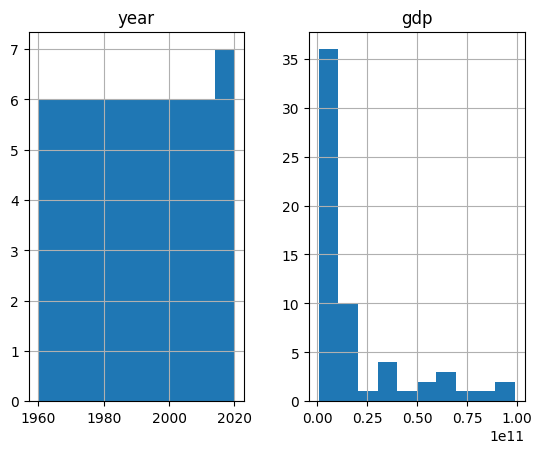

In [31]:
viz = cdf[['year','gdp']]
viz.hist()
plt.show()

Now we have the necessary data for proper analysis and prediction

Now to view Kenyas GDP From year 1960 to 2020 using barplot

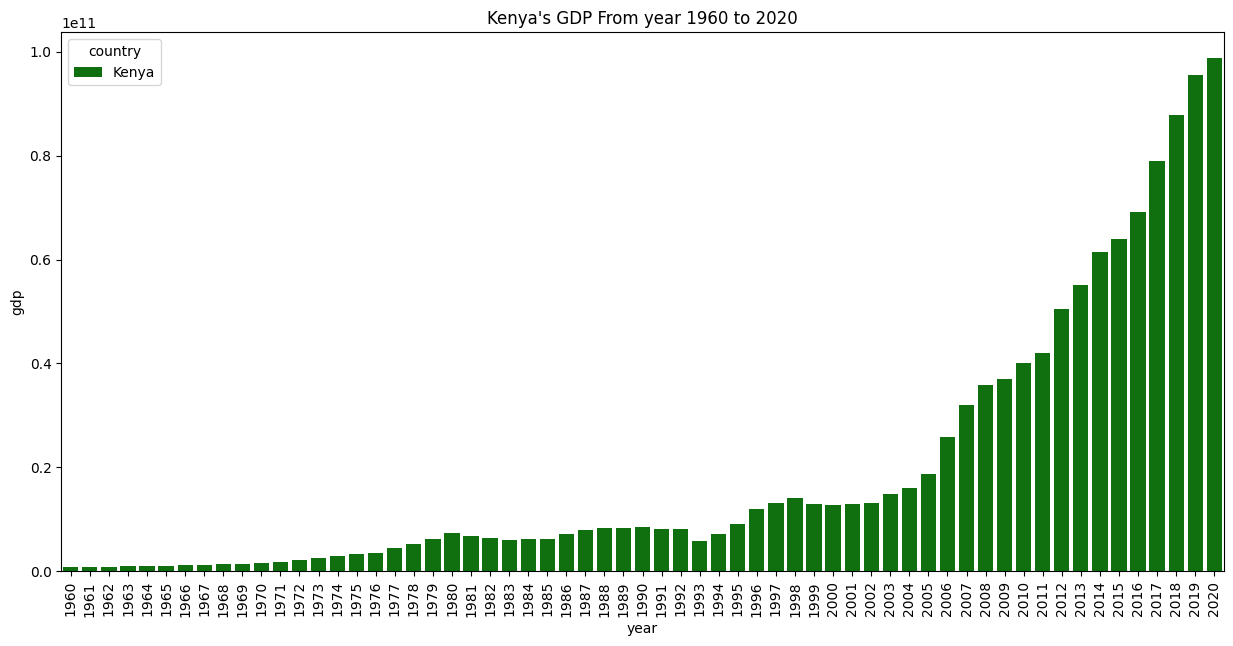

In [32]:
plt.figure(figsize = (15,7))
color = ['green']

sns.barplot(x = 'year',
y = 'gdp',
hue = 'country',
data = Kenya_gdp_data, palette=color)
plt.xticks(rotation = 90)
plt.title("Kenya's GDP From year 1960 to 2020")
plt.show()

Now lets start prediction models

Lets alocate variables data as follows

In [33]:
xx = Kenya_gdp_data.drop(['gdp', 'country'], axis=1)
yy = Kenya_gdp_data['gdp']

Now lets create our linear Regression model

In [34]:
Kenya_gdp_model=LinearRegression()
Kenya_gdp_model.fit(xx,yy)

LinearRegression()

In [35]:
prediction = Kenya_gdp_model.predict(xx)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

Lets Plot using a scatter plot to view Kenyan gdp per year against predicted values

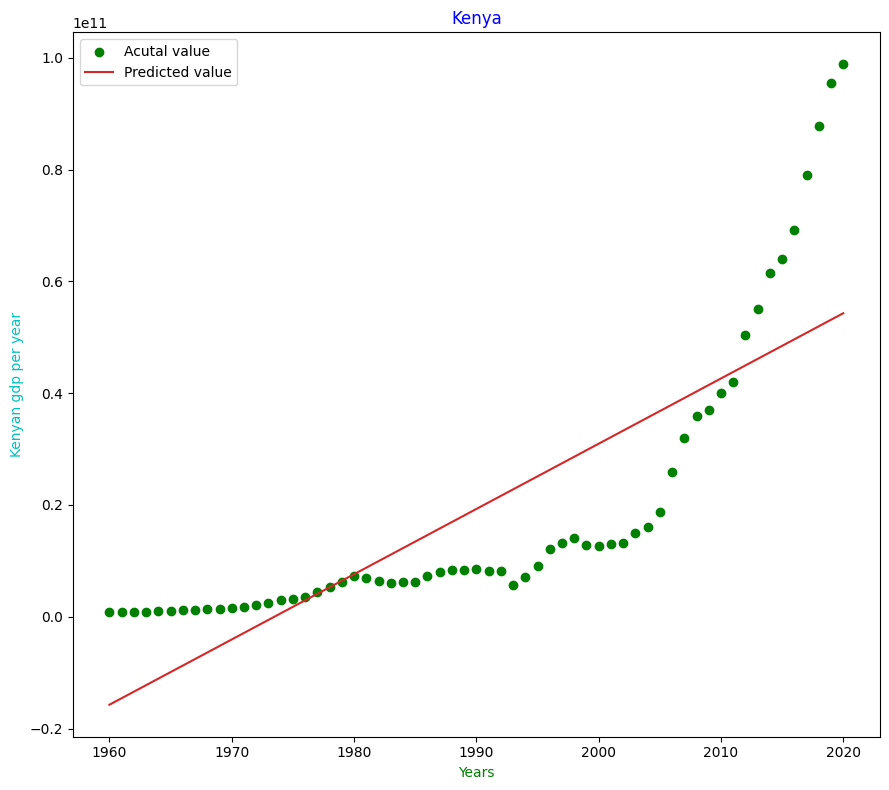

In [41]:
plt.figure(figsize=(9,8))
plt.scatter(xx,yy,label='Acutal value', color='green')
plt.plot(xx,prediction,color='tab:red',label='Predicted value')
plt.legend()
plt.title("Kenya",color='b')
plt.xlabel("Years",color='g')
plt.ylabel("Kenyan gdp per year",color='c')
plt.tight_layout()
plt.show()

In [43]:
years=[2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
for i in years:
    print(Kenya_gdp_model.predict([[i]]))

[5.54827292e+10]
[5.66503214e+10]
[5.78179136e+10]
[5.89855058e+10]
[6.0153098e+10]
[6.13206902e+10]
[6.24882824e+10]
[6.36558747e+10]
[6.48234669e+10]
[6.59910591e+10]


D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\georg\Documents\projects\Kenya_GDP_Analysis_and_prediction\env\Lib\site-packages\sklearn\base.py:450: Use

# Full Figures of the prediction results Above